In [1]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\Administrator\Intern Code\yolov8_corrosion_segmentation


In [2]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28  Python-3.10.9 torch-2.0.1+cpu CPU
Setup complete  (8 CPUs, 7.8 GB RAM, 176.4/199.3 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

C:\Users\Administrator\Intern Code\yolov8_corrosion_segmentation


Ultralytics YOLOv8.0.28  Python-3.10.9 torch-2.0.1+cpu CPU
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 C:\Users\Administrator\Intern Code\yolov8_corrosion_segmentation\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 424.1ms
Speed: 1.7ms pre-process, 424.1ms inference, 26.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict2


C:\Users\Administrator\Intern Code\yolov8_corrosion_segmentation


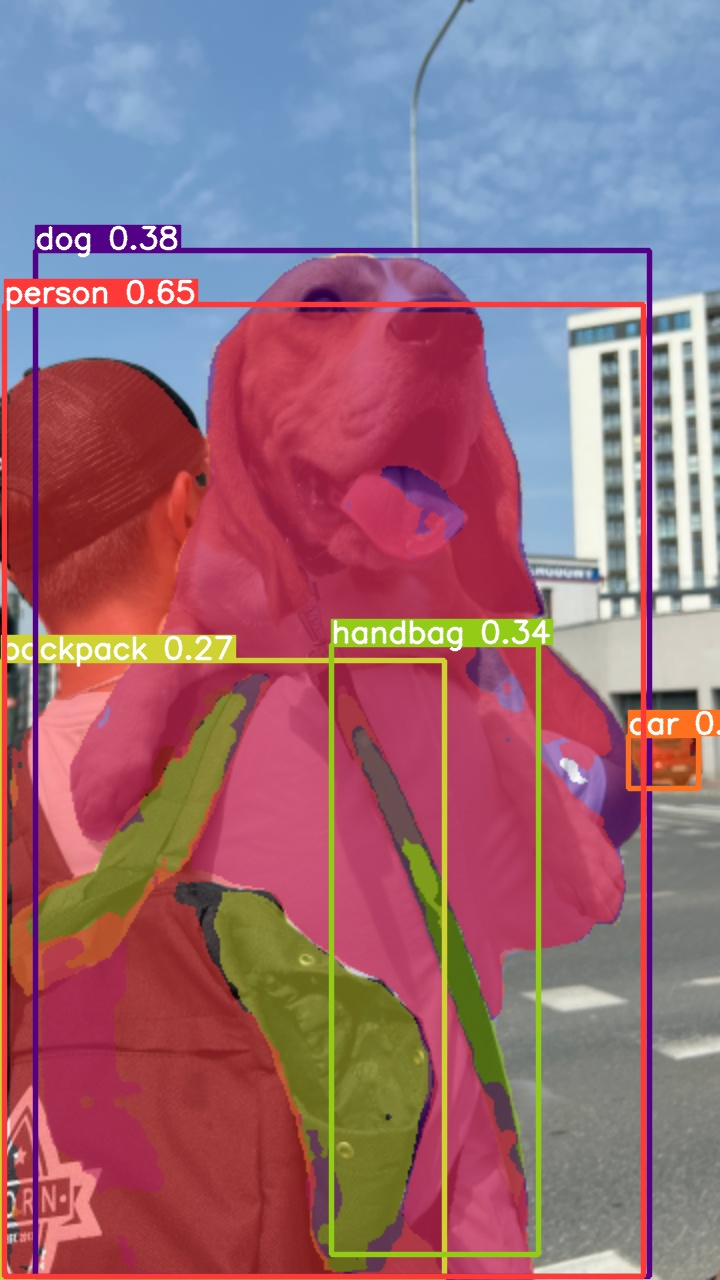

In [5]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

In [6]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.28  Python-3.10.9 torch-2.0.1+cpu CPU
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 C:\Users\Administrator\Intern Code\yolov8_corrosion_segmentation\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 434.9ms
Speed: 2.0ms pre-process, 434.9ms inference, 31.9ms postprocess per image at shape (1, 3, 640, 640)


In [7]:
results[0].boxes.xyxy

tensor([[4.00000e+00, 3.04000e+02, 6.43000e+02, 1.27600e+03],
        [6.28000e+02, 7.35000e+02, 6.98000e+02, 7.88000e+02],
        [3.50000e+01, 2.50000e+02, 6.49000e+02, 1.27600e+03],
        [3.31000e+02, 6.44000e+02, 5.38000e+02, 1.25400e+03],
        [1.00000e+00, 6.60000e+02, 4.44000e+02, 1.27800e+03]])

In [8]:
results[0].boxes.conf

tensor([0.64894, 0.52386, 0.37839, 0.34418, 0.26679])

In [9]:
results[0].boxes.cls

tensor([ 0.,  2., 16., 26., 24.])

In [10]:
results[0].masks.masks

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [11]:
path = f'{HOME}/datasets' 

os.makedirs(path, exist_ok=False) 

print("The new directory is created!")

%cd {HOME}/datasets

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Administrator\\Intern Code\\yolov8_corrosion_segmentation/datasets'

In [15]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [17]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data=datasets/data.yaml epochs=3 imgsz=640

C:\Users\Administrator\Intern Code\yolov8_corrosion_segmentation
^C


In [19]:
ls {HOME}/runs/segment/train4/

Parameter format not correct - "runs".


In [20]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train4/weights/best.pt data=datasets/data.yaml

C:\Users\Administrator\Intern Code\yolov8_corrosion_segmentation


Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Administrator\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Administrator\anaconda3\Scripts\yolo.exe\__main__.py", line 7, in <module>
  File "C:\Users\Administrator\anaconda3\lib\site-packages\ultralytics\yolo\cfg\__init__.py", line 217, in entrypoint
    raise argument_error(a)
SyntaxError: 'Code\yolov8_corrosion_segmentation/runs/segment/train4/weights/best.pt' is not a valid YOLO argument.

    YOLOv8 'yolo' CLI commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of [detect, segment, classify]
                MODE (required) is one of [train, val, predict, export]
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See